In [1]:
import glob
import os
import shutil
import random
import json
import pyarrow.parquet as pq
import numpy as np
import h5py
import math
import argparse
from tqdm import tqdm
import matplotlib.pyplot as plt


In [6]:
file =glob.glob('/pscratch/sd/b/bbbam/normalized_nan_replaced_m1p2To17p2_massreg_samples_chunksize_32_h5/*train*')
file_ = file[0]
data = h5py.File(f'{file_}', 'r')
num_images = len(data["all_jet"])
# num_images = 40000
print("Total number----", num_images)
batch_size =40000
mass = []
for start_idx in tqdm(range(0, num_images, 20)):
    end_idx = min(start_idx + batch_size, num_images)
    # images_batch = data["all_jet"][start_idx:end_idx, :, :, :]
    am_batch = data["am"][start_idx:end_idx, :]
    # ieta_batch = data["ieta"][start_idx:end_idx, :]
    # iphi_batch = data["iphi"][start_idx:end_idx, :]
    # m0_batch = data["m0"][start_idx:end_idx, :]
    mass.append(am_batch)
mass = np.concatenate(mass)
print("mean ----", np.mean(mass), "std  ------", np.std(mass))

Total number---- 5260685


100%|██████████| 263035/263035 [19:44<00:00, 222.15it/s] 


mean ---- 8.893934 std  ------ 4.4611673


(array([2.58312000e+08, 2.57738000e+08, 2.57598000e+08, 2.57566000e+08,
        2.57878000e+08, 2.57662000e+08, 2.43564000e+08, 2.71846000e+08,
        2.59424000e+08, 2.58158000e+08, 2.57900000e+08, 2.58474000e+08,
        2.57236000e+08, 2.58870000e+08, 2.58146000e+08, 2.59234000e+08,
        2.58460000e+08, 2.57180000e+08, 2.57776000e+08, 2.57800000e+08,
        2.57154000e+08, 2.58864000e+08, 2.58770000e+08, 2.58814000e+08,
        2.59644000e+08, 2.58302000e+08, 2.59766000e+08, 2.58066000e+08,
        2.59162000e+08, 2.60684000e+08, 2.57774000e+08, 2.61088000e+08,
        2.56646000e+08, 2.60316000e+08, 2.62042000e+08, 2.52249349e+08,
        2.45166119e+08, 2.38255383e+08, 2.16437122e+08, 1.63634374e+08,
        1.60616650e+08, 1.57117003e+08]),
 array([ 1.20000017,  1.58095253,  1.96190488,  2.34285712,  2.72380948,
         3.10476184,  3.4857142 ,  3.86666656,  4.24761915,  4.62857151,
         5.00952387,  5.39047623,  5.77142859,  6.15238094,  6.53333282,
         6.91428518

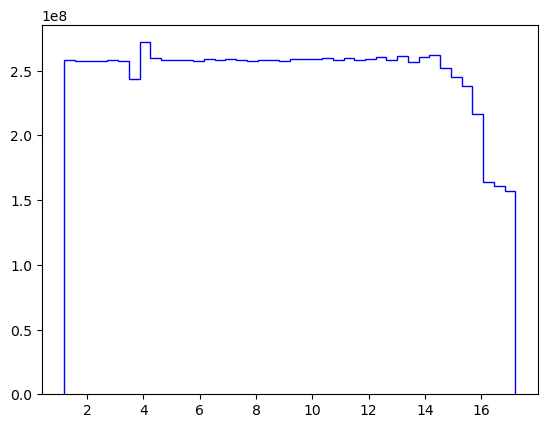

In [10]:
plt.hist(mass,bins=len(np.arange(1.2,18,0.4)),  histtype='step', color='b')

(array([1.08303200e+09, 1.08299400e+09, 1.08455400e+09, 1.08363000e+09,
        1.08376600e+09, 1.08457000e+09, 1.08585200e+09, 1.08728000e+09,
        1.05817841e+09, 7.47533587e+08]),
 array([ 1.20000017,  2.79999995,  4.4000001 ,  6.        ,  7.59999943,
         9.19999981, 10.79999924, 12.39999962, 13.99999905, 15.59999943,
        17.19999886]),
 [<matplotlib.patches.Polygon at 0x7fb045a002d0>])

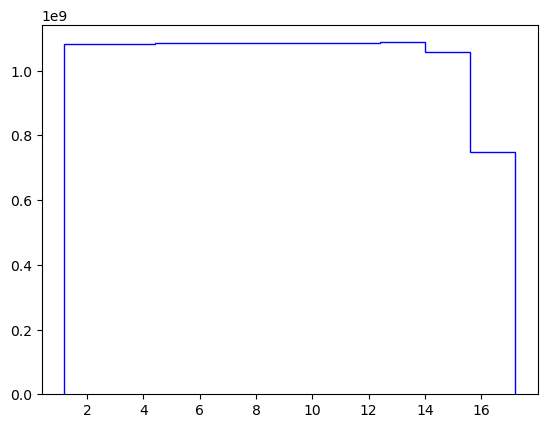

In [11]:
plt.hist(mass,  histtype='step', color='b')